In [1]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_plotly, plot_components_plotly

c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv('DataSARIMAX.csv',sep=';', decimal=',', index_col='DATE', parse_dates=True, dayfirst=True)
pd.set_option('display.float_format', '{:,.2f}'.format)
df.sort_index(inplace=True)
print(df.shape)
df.head()

(365, 4)


,DAY,HOLIDAY,HOLIDAY_NAME,VOLUME
DATE,,,,
2022-06-01,Wednesday,1,Hari Lahir Pancasila,44003.56
2022-06-02,Thursday,0,na,48991.85
2022-06-03,Friday,0,na,51690.92
2022-06-04,Saturday,0,na,47790.83
2022-06-05,Sunday,0,na,42896.64


In [3]:
df['VOLUME'] = df['VOLUME'].astype(float)
df['HOLIDAY'] = df['HOLIDAY'].astype(int)
print(df.dtypes)
df.head()

DAY              object
HOLIDAY           int32
HOLIDAY_NAME     object
VOLUME          float64
dtype: object


,DAY,HOLIDAY,HOLIDAY_NAME,VOLUME
DATE,,,,
2022-06-01,Wednesday,1,Hari Lahir Pancasila,"44,003.56"
2022-06-02,Thursday,0,na,"48,991.85"
2022-06-03,Friday,0,na,"51,690.92"
2022-06-04,Saturday,0,na,"47,790.83"
2022-06-05,Sunday,0,na,"42,896.64"


In [4]:
df_edit = df.drop(df.columns[[0, 1, 2]], axis=1)
df_edit.head()

,VOLUME
DATE,
2022-06-01,"44,003.56"
2022-06-02,"48,991.85"
2022-06-03,"51,690.92"
2022-06-04,"47,790.83"
2022-06-05,"42,896.64"


In [5]:
df_edit.reset_index( inplace=True)
df_edit.head()

,DATE,VOLUME
0,2022-06-01,"44,003.56"
1,2022-06-02,"48,991.85"
2,2022-06-03,"51,690.92"
3,2022-06-04,"47,790.83"
4,2022-06-05,"42,896.64"


In [6]:
df_edit.rename(columns={'DATE':'ds'}, inplace=True)
df_edit.rename(columns={'VOLUME':'y'}, inplace=True)
df_edit

,ds,y
0,2022-06-01,"44,003.56"
1,2022-06-02,"48,991.85"
2,2022-06-03,"51,690.92"
3,2022-06-04,"47,790.83"
4,2022-06-05,"42,896.64"
...,...,...
360,2023-05-27,"42,088.95"
361,2023-05-28,"34,965.85"
362,2023-05-29,"41,785.99"
363,2023-05-30,"44,387.87"


Prophet With Spliting Data Set

In [7]:
# Split the data into train and test sets
train_size = int(len(df_edit) * 0.8)  # Use 80% of the data for training
train = df_edit.iloc[:train_size]
test = df_edit.iloc[train_size:]
print(df_edit.shape)
print(train.shape,test.shape)

(365, 2)
(292, 2) (73, 2)


In [8]:
model.add_seasonality(name="weekly", period=7, fourier_order=10)

In [9]:
# Train the model
model.fit(train)


11:21:02 - cmdstanpy - INFO - Chain [1] start processing
11:21:02 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future_dates = model.make_future_dataframe(len(test))
future_dates

,ds
0,2022-06-01
1,2022-06-02
2,2022-06-03
3,2022-06-04
4,2022-06-05
...,...
360,2023-05-27
361,2023-05-28
362,2023-05-29
363,2023-05-30


In [15]:
prediction =  model.predict(future_dates)

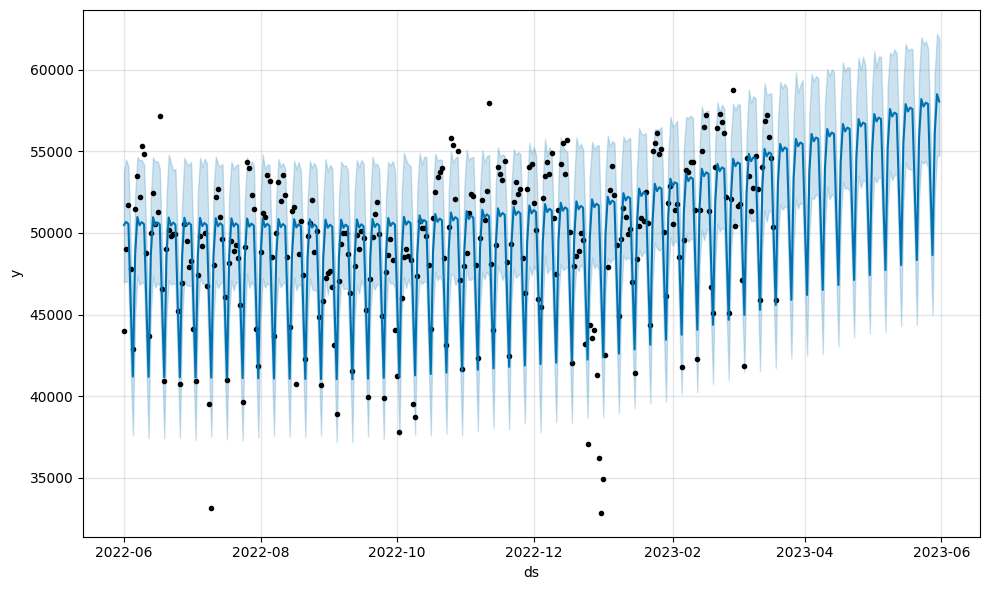

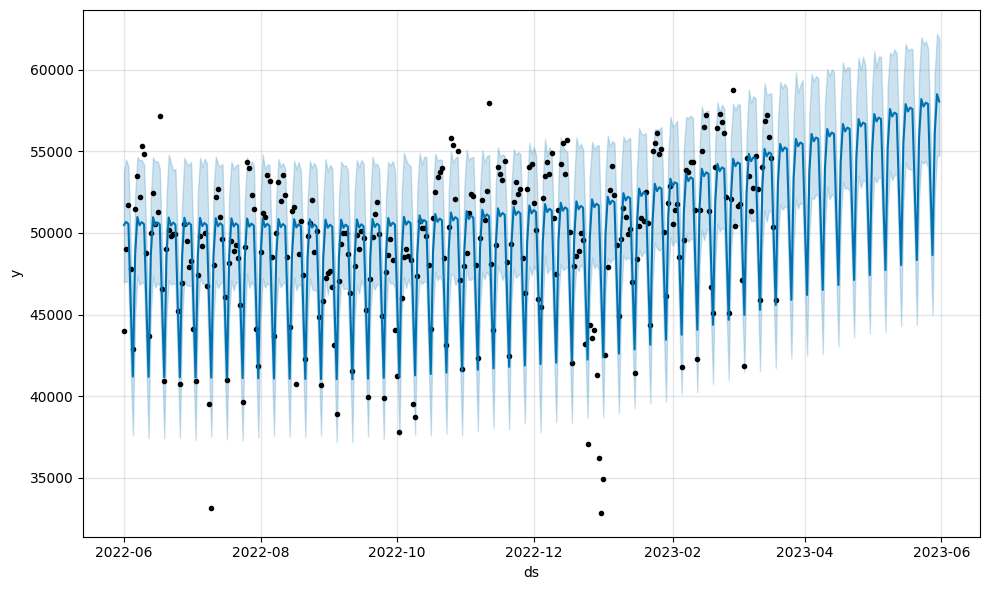

In [16]:
# Plot Prediction
model.plot(prediction)

prophet with full data set

In [193]:
m = Prophet(weekly_seasonality = True, seasonality_prior_scale=0.1, 
            changepoint_range=1, changepoint_prior_scale = 0.4)


In [194]:
forecast = m.fit(df_edit)

22:06:38 - cmdstanpy - INFO - Chain [1] start processing


22:06:39 - cmdstanpy - INFO - Chain [1] done processing


In [195]:
future = m.make_future_dataframe(periods=30)
future.tail

<bound method NDFrame.tail of             ds
0   2022-06-01
1   2022-06-02
2   2022-06-03
3   2022-06-04
4   2022-06-05
..         ...
390 2023-06-26
391 2023-06-27
392 2023-06-28
393 2023-06-29
394 2023-06-30

[395 rows x 1 columns]>

In [196]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
390,2023-06-26,"39,973.28","32,169.57","47,129.50"
391,2023-06-27,"42,128.51","34,437.02","49,217.19"
392,2023-06-28,"41,326.93","33,978.56","48,853.47"
393,2023-06-29,"41,274.18","33,745.83","49,194.82"
394,2023-06-30,"41,061.74","33,336.22","48,709.62"


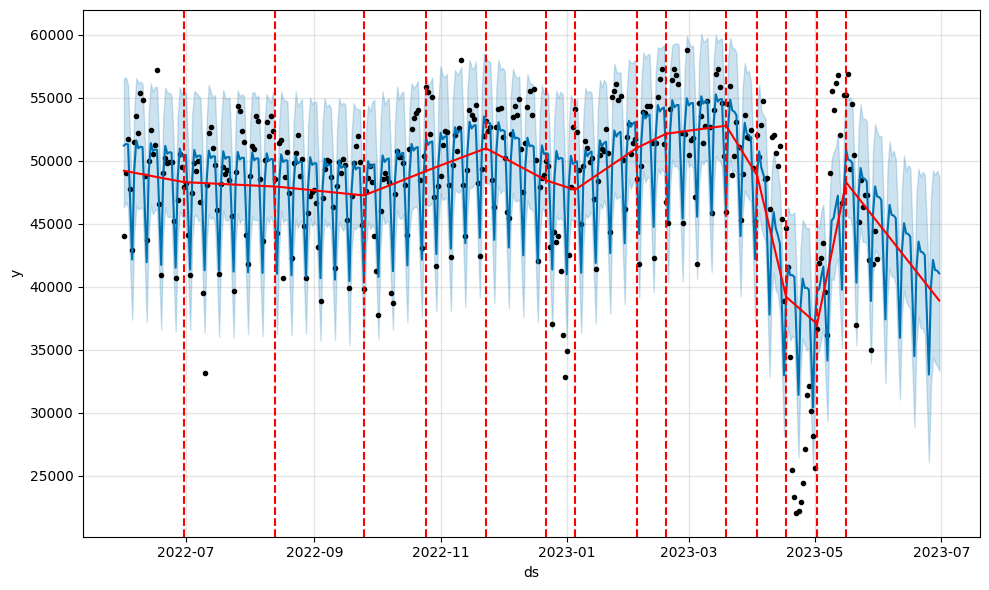

In [197]:
fig1 = m.plot(forecast)
fig1 = add_changepoints_to_plot(fig1.gca(), m, forecast)


prophet with full data set and holiday

In [583]:
df

,DAY,HOLIDAY,HOLIDAY_NAME,VOLUME
DATE,,,,
2022-06-01,Wednesday,1,Hari Lahir Pancasila,"44,003.56"
2022-06-02,Thursday,0,na,"48,991.85"
2022-06-03,Friday,0,na,"51,690.92"
2022-06-04,Saturday,0,na,"47,790.83"
2022-06-05,Sunday,0,na,"42,896.64"
...,...,...,...,...
2023-05-27,Saturday,0,na,"42,088.95"
2023-05-28,Sunday,0,na,"34,965.85"
2023-05-29,Monday,0,na,"41,785.99"


In [584]:
holiday_date = df.copy()
holiday_date.reset_index(inplace=True)
holiday_date = holiday_date.drop(holiday_date.columns[[1,4]], axis=1)
holiday_date = holiday_date[holiday_date['HOLIDAY']!=0]
holiday_date = holiday_date.reset_index(inplace=False)
holiday_date = holiday_date.drop(holiday_date.columns[[0]], axis=1)
holiday_date['HOLIDAY_NAME'] = holiday_date['HOLIDAY_NAME'].str.strip()
holiday_date['HOLIDAY_NAME'] = holiday_date['HOLIDAY_NAME'].str.replace(' ', '_')
holiday_date = holiday_date[holiday_date['HOLIDAY_NAME']!='Imlek']
holiday_date = holiday_date[holiday_date['HOLIDAY_NAME']!='Idul_Fitri']
holiday_date = holiday_date[holiday_date['HOLIDAY_NAME']!='Nyepi']
holiday_date

,DATE,HOLIDAY,HOLIDAY_NAME
0,2022-06-01,1,Hari_Lahir_Pancasila
1,2022-07-09,1,Idul_Adha
2,2022-07-30,1,Tahun_Baru_Islam
3,2022-08-17,1,Hari_Kemerdekaan
4,2022-10-08,1,Maulid_Nabi
5,2022-12-05,1,Natal
6,2023-01-01,1,Tahun_Baru
9,2023-02-18,1,Isra_Mikraj
12,2023-04-07,1,Wafat_Isa_Almasih
20,2023-05-01,1,Hari_Buruh


In [585]:
holiday_date = holiday_date.rename(columns={"DATE":'ds','HOLIDAY_NAME':'holiday'})
holiday_date['ds_upper'] = holiday_date['ds']
holiday_date['lower_window'] = 0
holiday_date['upper_window'] = 1
new_order = ['holiday', 'ds', 'lower_window', 'ds_upper', 'upper_window']
holiday_date =holiday_date[new_order]
holiday_date

,holiday,ds,lower_window,ds_upper,upper_window
0,Hari_Lahir_Pancasila,2022-06-01,0,2022-06-01,1
1,Idul_Adha,2022-07-09,0,2022-07-09,1
2,Tahun_Baru_Islam,2022-07-30,0,2022-07-30,1
3,Hari_Kemerdekaan,2022-08-17,0,2022-08-17,1
4,Maulid_Nabi,2022-10-08,0,2022-10-08,1
5,Natal,2022-12-05,0,2022-12-05,1
6,Tahun_Baru,2023-01-01,0,2023-01-01,1
9,Isra_Mikraj,2023-02-18,0,2023-02-18,1
12,Wafat_Isa_Almasih,2023-04-07,0,2023-04-07,1
20,Hari_Buruh,2023-05-01,0,2023-05-01,1


In [586]:
# Python
holiday = pd.DataFrame([
    {'holiday': 'Imlek', 'ds': '2023-01-22', 'lower_window': 0, 'ds_upper': '2023-01-23'},
    {'holiday': 'Nyepi', 'ds': '2023-03-22', 'lower_window': 0, 'ds_upper': '2023-03-23'},
    {'holiday': 'Idul_Fitri', 'ds': '2023-04-19', 'lower_window': 0, 'ds_upper': '2023-04-25'},
])

for t_col in ['ds', 'ds_upper']:
    holiday[t_col] = pd.to_datetime(holiday[t_col])
holiday['upper_window'] = ((holiday['ds_upper'] - holiday['ds'])).dt.days + 1
holiday

,holiday,ds,lower_window,ds_upper,upper_window
0,Imlek,2023-01-22,0,2023-01-23,2
1,Nyepi,2023-03-22,0,2023-03-23,2
2,Idul_Fitri,2023-04-19,0,2023-04-25,7


In [587]:
holiday = holiday.append(holiday_date)
holiday = holiday.sort_values('ds')
holiday

C:\Users\rizki\AppData\Local\Temp\ipykernel_14012\363067817.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  holiday = holiday.append(holiday_date)


,holiday,ds,lower_window,ds_upper,upper_window
0,Hari_Lahir_Pancasila,2022-06-01,0,2022-06-01,1
1,Idul_Adha,2022-07-09,0,2022-07-09,1
2,Tahun_Baru_Islam,2022-07-30,0,2022-07-30,1
3,Hari_Kemerdekaan,2022-08-17,0,2022-08-17,1
4,Maulid_Nabi,2022-10-08,0,2022-10-08,1
5,Natal,2022-12-05,0,2022-12-05,1
6,Tahun_Baru,2023-01-01,0,2023-01-01,1
0,Imlek,2023-01-22,0,2023-01-23,2
9,Isra_Mikraj,2023-02-18,0,2023-02-18,1
1,Nyepi,2023-03-22,0,2023-03-23,2


In [588]:
df_no_outlier = df_edit.copy()
df_no_outlier.loc[(df_no_outlier['ds'] >= '2023-04-19') & (df_no_outlier['ds'] <= '2023-05-03'), 'y'] = None

filtered_df = df_no_outlier.loc[(df_no_outlier['ds'] >= '2023-04-19') & (df_no_outlier['ds'] <= '2023-05-03')]
filtered_df

,ds,y
322,2023-04-19,NaN
323,2023-04-20,NaN
324,2023-04-21,NaN
325,2023-04-22,NaN
326,2023-04-23,NaN
327,2023-04-24,NaN
328,2023-04-25,NaN
329,2023-04-26,NaN
330,2023-04-27,NaN
331,2023-04-28,NaN


In [589]:
m = Prophet(weekly_seasonality = 'auto', seasonality_prior_scale=0.2, 
            changepoint_range=1, changepoint_prior_scale = 0.25,
            holidays=holiday)


In [590]:
#NORMAL
forecast = m.fit(df_edit)

04:39:39 - cmdstanpy - INFO - Chain [1] start processing
04:39:39 - cmdstanpy - INFO - Chain [1] done processing


In [591]:
# #REMOVE OUTLIER
# forecast = m.fit(df_no_outlier)

In [592]:
future = m.make_future_dataframe(periods=30)
future.tail

<bound method NDFrame.tail of             ds
0   2022-06-01
1   2022-06-02
2   2022-06-03
3   2022-06-04
4   2022-06-05
..         ...
390 2023-06-26
391 2023-06-27
392 2023-06-28
393 2023-06-29
394 2023-06-30

[395 rows x 1 columns]>

In [593]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
390,2023-06-26,"46,602.49","42,537.29","50,787.84"
391,2023-06-27,"48,754.96","45,009.51","52,787.91"
392,2023-06-28,"48,699.80","44,808.64","52,998.53"
393,2023-06-29,"48,301.59","44,258.09","52,826.66"
394,2023-06-30,"48,150.31","44,082.51","52,720.54"


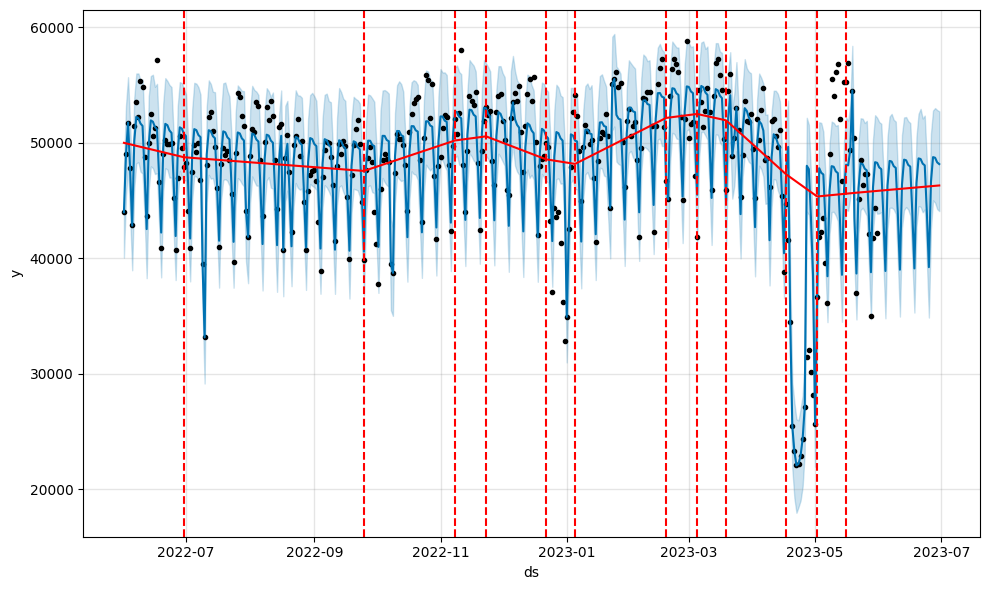

In [594]:
fig1 = m.plot(forecast)
fig1 = add_changepoints_to_plot(fig1.gca(), m, forecast)


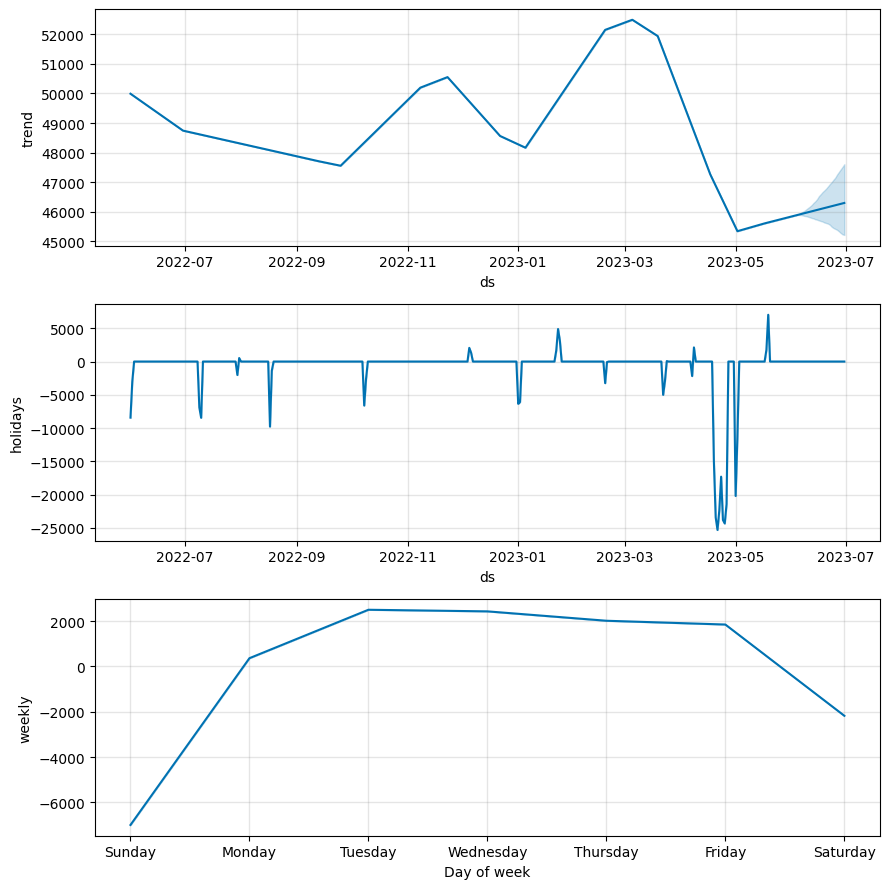

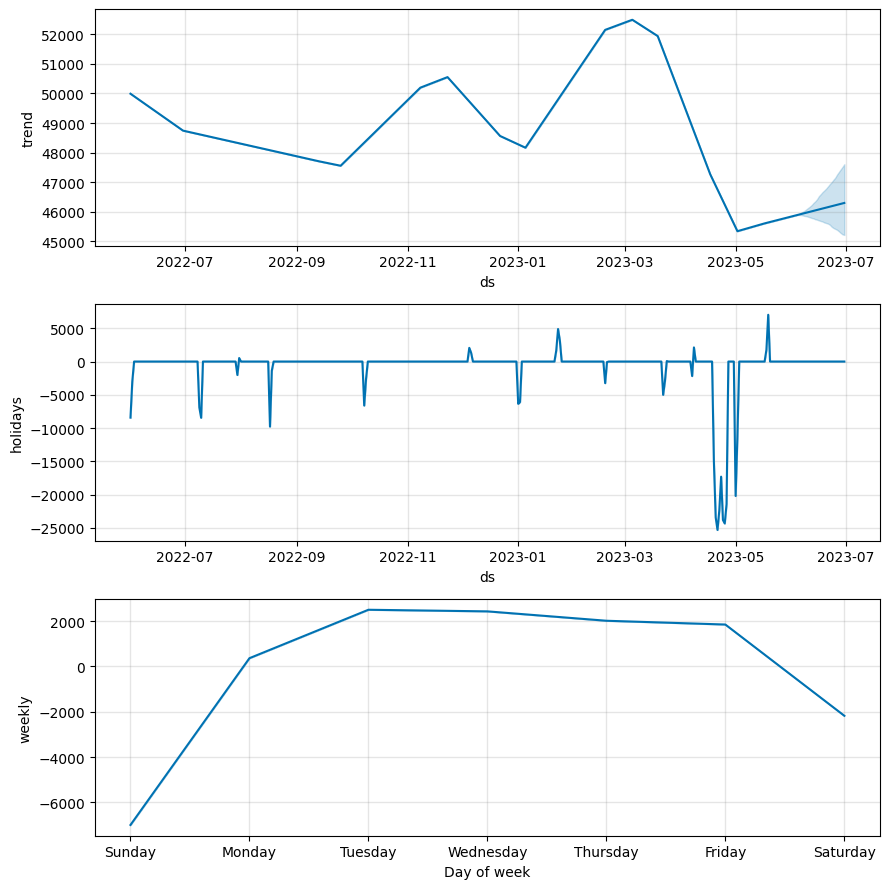

In [595]:
m.plot_components(forecast)

Foreast Result for June 2023

In [596]:
forecast_result = forecast[['ds', 'yhat']]
forecast_result.rename(columns={'ds':'DATE','yhat':'FORECAST'}, inplace=True)
forecast_result['DATE'] = pd.to_datetime(forecast_result['DATE'])
forecast_result.set_index('DATE', inplace = True)
forecast_result

C:\Users\rizki\AppData\Local\Temp\ipykernel_14012\2427669168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_result.rename(columns={'ds':'DATE','yhat':'FORECAST'}, inplace=True)
C:\Users\rizki\AppData\Local\Temp\ipykernel_14012\2427669168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_result['DATE'] = pd.to_datetime(forecast_result['DATE'])


,FORECAST
DATE,
2022-06-01,"43,988.56"
2022-06-02,"48,974.47"
2022-06-03,"51,754.38"
2022-06-04,"47,686.66"
2022-06-05,"42,824.46"
...,...
2023-06-26,"46,602.49"
2023-06-27,"48,754.96"
2023-06-28,"48,699.80"


In [597]:
forecast_june_2023 = forecast_result.loc[(forecast_result.index >= '2023-06-01') 
                                         & (forecast_result.index <= '2023-06-30')]
forecast_june_2023

,FORECAST
DATE,
2023-06-01,"47,862.46"
2023-06-02,"47,711.18"
2023-06-03,"43,702.13"
2023-06-04,"38,898.59"
2023-06-05,"46,273.14"
2023-06-06,"48,425.61"
2023-06-07,"48,370.45"
2023-06-08,"47,972.24"
2023-06-09,"47,820.97"


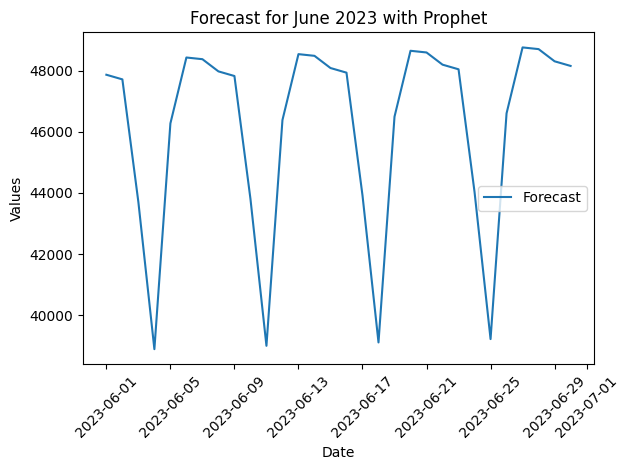

In [598]:
import matplotlib.pyplot as plt

# Create the line plot

plt.plot(forecast_june_2023.index, forecast_june_2023['FORECAST'], label='Forecast')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Forecast for June 2023 with Prophet')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [599]:
df_volume = df.drop(df.columns[[0,1,2]], axis=1)
df_volume.rename(columns={'VOLUME':'ACTUAL'}, inplace=True)
df_volume

,ACTUAL
DATE,
2022-06-01,"44,003.56"
2022-06-02,"48,991.85"
2022-06-03,"51,690.92"
2022-06-04,"47,790.83"
2022-06-05,"42,896.64"
...,...
2023-05-27,"42,088.95"
2023-05-28,"34,965.85"
2023-05-29,"41,785.99"


In [600]:
actual_vs_forecast = forecast_result.loc[(forecast_result.index >= '2022-06-01') 
                                         & (forecast_result.index <= '2023-05-31')]
actual_vs_forecast = actual_vs_forecast.join(df_volume)
actual_vs_forecast

,FORECAST,ACTUAL
DATE,,
2022-06-01,"43,988.56","44,003.56"
2022-06-02,"48,974.47","48,991.85"
2022-06-03,"51,754.38","51,690.92"
2022-06-04,"47,686.66","47,790.83"
2022-06-05,"42,824.46","42,896.64"
...,...,...
2023-05-27,"43,592.35","42,088.95"
2023-05-28,"38,788.81","34,965.85"
2023-05-29,"46,163.35","41,785.99"


In [601]:
actual_vs_forecast.to_csv('actual_forecast_prophet.csv', index=True)

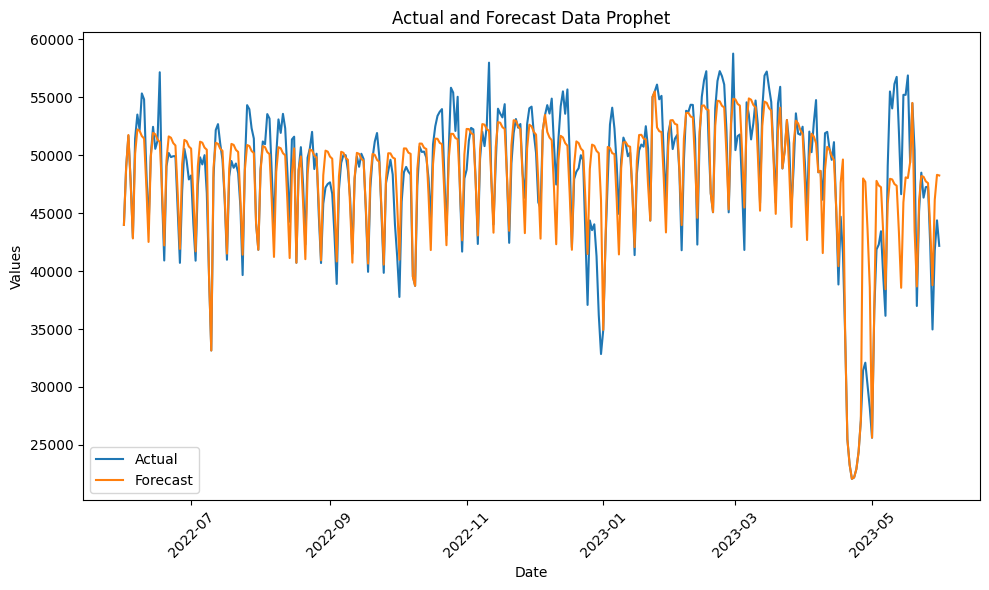

In [602]:
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(actual_vs_forecast.index, actual_vs_forecast['ACTUAL'], label='Actual')
plt.plot(actual_vs_forecast.index, actual_vs_forecast['FORECAST'], label='Forecast')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual and Forecast Data Prophet')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Forecast Accuracy

In [603]:
# Split the data into train and test sets
train_size = int(len(actual_vs_forecast) * 0.8) 
train = actual_vs_forecast.iloc[:train_size]
test = actual_vs_forecast.iloc[train_size:]
print(actual_vs_forecast.shape)
print(train.shape,test.shape)

(365, 2)
(292, 2) (73, 2)


In [604]:
test.tail

<bound method NDFrame.tail of             FORECAST    ACTUAL
DATE                          
2023-03-20 52,141.82 54,475.40
2023-03-21 54,117.54 55,916.10
2023-03-22 48,876.93 48,862.36
2023-03-23 50,387.94 50,378.88
2023-03-24 53,053.10 53,045.17
...              ...       ...
2023-05-27 43,592.35 42,088.95
2023-05-28 38,788.81 34,965.85
2023-05-29 46,163.35 41,785.99
2023-05-30 48,315.83 44,387.87
2023-05-31 48,260.67 42,184.39

[73 rows x 2 columns]>

In [605]:
test.to_csv('Hasil_Prophet_Test', index=True)

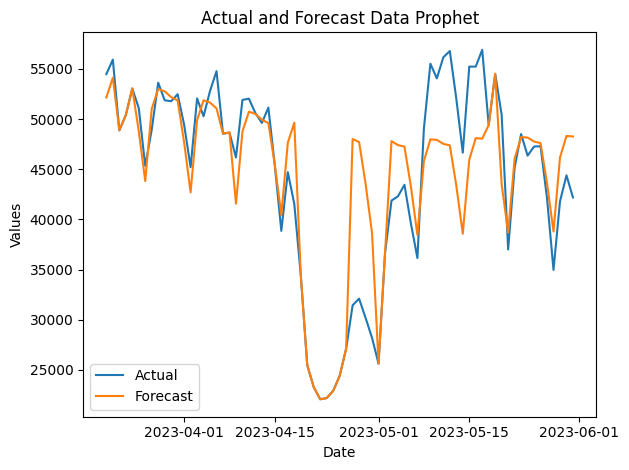

In [606]:
# Create the line plot
# plt.figure(figsize=(10, 6))
plt.plot(test.index, test['ACTUAL'], label='Actual')
plt.plot(test.index, test['FORECAST'], label='Forecast')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual and Forecast Data Prophet')
plt.legend()
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [607]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate Mean Absolute Deviation (MAD)
mad = mean_absolute_error(test['ACTUAL'], test['FORECAST'])
print("Mean Absolute Deviation (MAD):", mad)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test['ACTUAL'] - test['FORECAST']) / test['FORECAST'])) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['ACTUAL'], test['FORECAST'])
print("Mean Squared Error (MSE):", mse)

Mean Absolute Deviation (MAD): 3220.7791733003346
Mean Absolute Percentage Error (MAPE): 7.022401936014411
Mean Squared Error (MSE): 25109181.534142923


## Fine Tuning

In [189]:
holiday_date = df.copy()
holiday_date.reset_index(inplace=True)
holiday_date = holiday_date.drop(holiday_date.columns[[1,4]], axis=1)
holiday_date = holiday_date[holiday_date['HOLIDAY']!=0]
holiday_date = holiday_date.reset_index(inplace=False)
holiday_date = holiday_date.drop(holiday_date.columns[[0]], axis=1)
holiday_date['HOLIDAY_NAME'] = holiday_date['HOLIDAY_NAME'].str.strip()
holiday_date['HOLIDAY_NAME'] = holiday_date['HOLIDAY_NAME'].str.replace(' ', '_')
holiday_date = holiday_date[holiday_date['HOLIDAY_NAME']!='Imlek']
holiday_date = holiday_date[holiday_date['HOLIDAY_NAME']!='Idul_Fitri']
holiday_date = holiday_date[holiday_date['HOLIDAY_NAME']!='Nyepi']
holiday_date

,DATE,HOLIDAY,HOLIDAY_NAME
0,2022-06-01,1,Hari_Lahir_Pancasila
1,2022-07-09,1,Idul_Adha
2,2022-07-30,1,Tahun_Baru_Islam
3,2022-08-17,1,Hari_Kemerdekaan
4,2022-10-08,1,Maulid_Nabi
5,2022-12-05,1,Natal
6,2023-01-01,1,Tahun_Baru
9,2023-02-18,1,Isra_Mikraj
12,2023-04-07,1,Wafat_Isa_Almasih
20,2023-05-01,1,Hari_Buruh


In [190]:
holiday_date = holiday_date.rename(columns={"DATE":'ds','HOLIDAY_NAME':'holiday'})
holiday_date['ds_upper'] = holiday_date['ds']
holiday_date['lower_window'] = 0
holiday_date['upper_window'] = 1
new_order = ['holiday', 'ds', 'lower_window', 'ds_upper', 'upper_window']
holiday_date =holiday_date[new_order]
holiday_date

,holiday,ds,lower_window,ds_upper,upper_window
0,Hari_Lahir_Pancasila,2022-06-01,0,2022-06-01,1
1,Idul_Adha,2022-07-09,0,2022-07-09,1
2,Tahun_Baru_Islam,2022-07-30,0,2022-07-30,1
3,Hari_Kemerdekaan,2022-08-17,0,2022-08-17,1
4,Maulid_Nabi,2022-10-08,0,2022-10-08,1
5,Natal,2022-12-05,0,2022-12-05,1
6,Tahun_Baru,2023-01-01,0,2023-01-01,1
9,Isra_Mikraj,2023-02-18,0,2023-02-18,1
12,Wafat_Isa_Almasih,2023-04-07,0,2023-04-07,1
20,Hari_Buruh,2023-05-01,0,2023-05-01,1


In [191]:
# Python
holiday = pd.DataFrame([
    {'holiday': 'Imlek', 'ds': '2023-01-22', 'lower_window': 0, 'ds_upper': '2023-01-23'},
    {'holiday': 'Nyepi', 'ds': '2023-03-22', 'lower_window': 0, 'ds_upper': '2023-03-23'},
    {'holiday': 'Idul_Fitri', 'ds': '2023-04-19', 'lower_window': 0, 'ds_upper': '2023-04-25'},
])

for t_col in ['ds', 'ds_upper']:
    holiday[t_col] = pd.to_datetime(holiday[t_col])
holiday['upper_window'] = ((holiday['ds_upper'] - holiday['ds'])).dt.days + 1
holiday

,holiday,ds,lower_window,ds_upper,upper_window
0,Imlek,2023-01-22,0,2023-01-23,2
1,Nyepi,2023-03-22,0,2023-03-23,2
2,Idul_Fitri,2023-04-19,0,2023-04-25,7


In [192]:
holiday = holiday.append(holiday_date)
holiday = holiday.sort_values('ds')
holiday

C:\Users\rizki\AppData\Local\Temp\ipykernel_14948\363067817.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  holiday = holiday.append(holiday_date)


,holiday,ds,lower_window,ds_upper,upper_window
0,Hari_Lahir_Pancasila,2022-06-01,0,2022-06-01,1
1,Idul_Adha,2022-07-09,0,2022-07-09,1
2,Tahun_Baru_Islam,2022-07-30,0,2022-07-30,1
3,Hari_Kemerdekaan,2022-08-17,0,2022-08-17,1
4,Maulid_Nabi,2022-10-08,0,2022-10-08,1
5,Natal,2022-12-05,0,2022-12-05,1
6,Tahun_Baru,2023-01-01,0,2023-01-01,1
0,Imlek,2023-01-22,0,2023-01-23,2
9,Isra_Mikraj,2023-02-18,0,2023-02-18,1
1,Nyepi,2023-03-22,0,2023-03-23,2


In [193]:
holiday.loc[holiday['holiday'] == 'Idul_Fitri', 'upper_window'] = 12
holiday.loc[holiday['holiday'] == 'Idul_Fitri', 'ds_upper'] = pd.to_datetime("2023-04-30")

holiday

,holiday,ds,lower_window,ds_upper,upper_window
0,Hari_Lahir_Pancasila,2022-06-01,0,2022-06-01,1
1,Idul_Adha,2022-07-09,0,2022-07-09,1
2,Tahun_Baru_Islam,2022-07-30,0,2022-07-30,1
3,Hari_Kemerdekaan,2022-08-17,0,2022-08-17,1
4,Maulid_Nabi,2022-10-08,0,2022-10-08,1
5,Natal,2022-12-05,0,2022-12-05,1
6,Tahun_Baru,2023-01-01,0,2023-01-01,1
0,Imlek,2023-01-22,0,2023-01-23,2
9,Isra_Mikraj,2023-02-18,0,2023-02-18,1
1,Nyepi,2023-03-22,0,2023-03-23,2


In [194]:
m = Prophet(weekly_seasonality = 'auto', seasonality_prior_scale=0.01,
            changepoint_range=1, changepoint_prior_scale = 0.02, 
             holidays=holiday)


In [195]:
#NORMAL
forecast = m.fit(df_edit)

04:12:35 - cmdstanpy - INFO - Chain [1] start processing
04:12:35 - cmdstanpy - INFO - Chain [1] done processing


In [196]:
future = m.make_future_dataframe(periods=30)
future.tail

<bound method NDFrame.tail of             ds
0   2022-06-01
1   2022-06-02
2   2022-06-03
3   2022-06-04
4   2022-06-05
..         ...
390 2023-06-26
391 2023-06-27
392 2023-06-28
393 2023-06-29
394 2023-06-30

[395 rows x 1 columns]>

In [197]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
390,2023-06-26,"48,354.06","44,456.73","52,209.51"
391,2023-06-27,"50,104.86","46,180.48","54,023.02"
392,2023-06-28,"49,979.33","45,942.21","53,936.23"
393,2023-06-29,"49,973.05","46,044.28","53,974.40"
394,2023-06-30,"49,812.94","45,851.70","53,946.94"


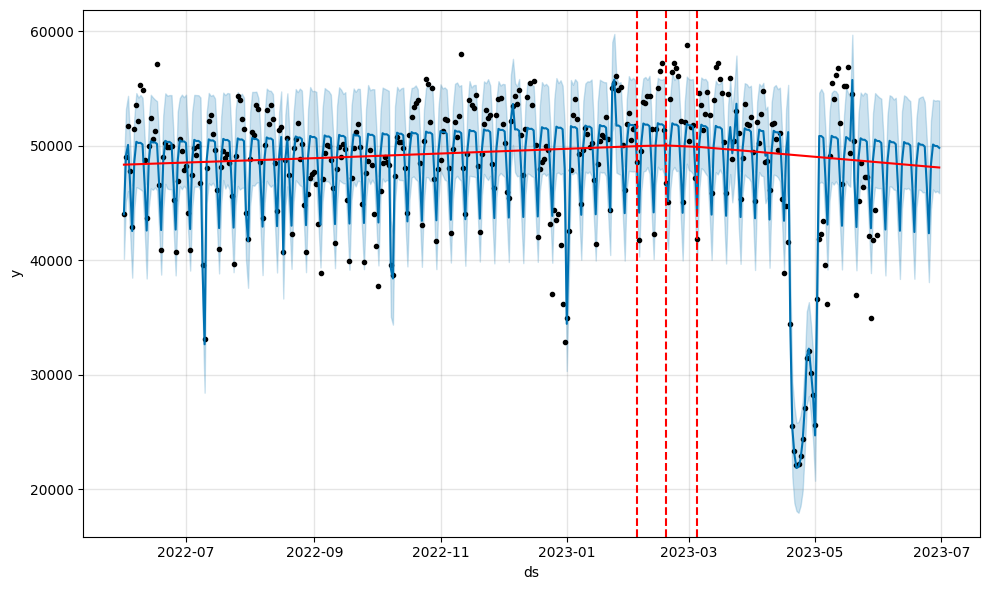

In [198]:
fig1 = m.plot(forecast)
fig1 = add_changepoints_to_plot(fig1.gca(), m, forecast)


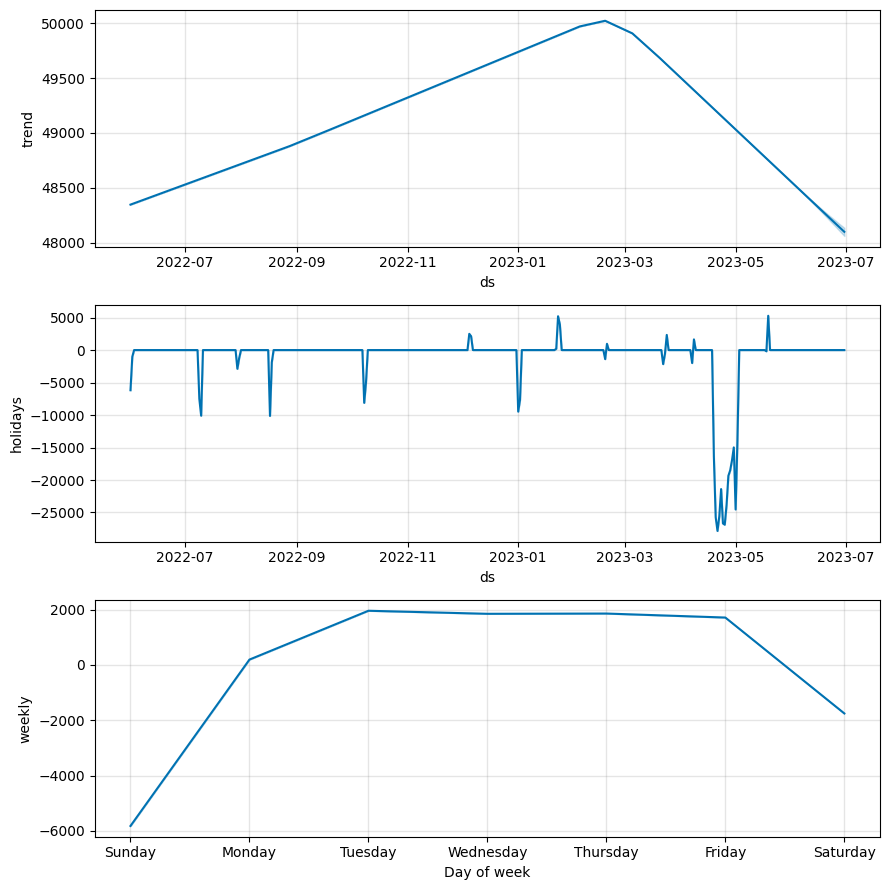

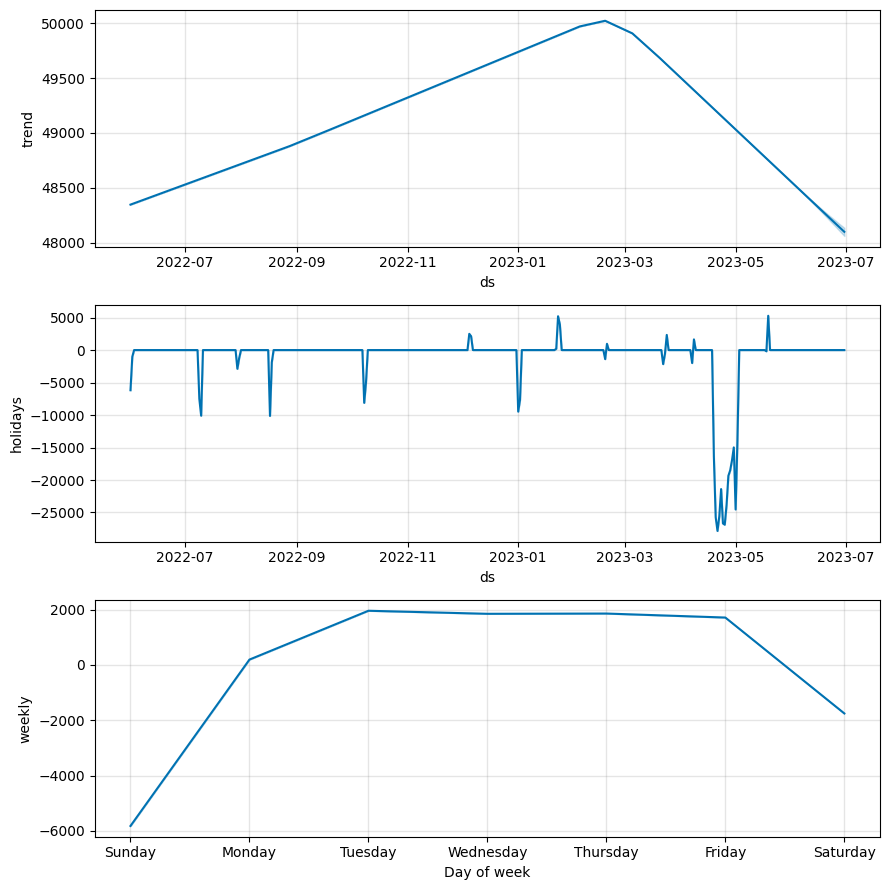

In [199]:
m.plot_components(forecast)

Foreast Result for June 2023

In [200]:
forecast_result = forecast[['ds', 'yhat']]
forecast_result.rename(columns={'ds':'DATE','yhat':'FORECAST'}, inplace=True)
forecast_result['DATE'] = pd.to_datetime(forecast_result['DATE'])
forecast_result.set_index('DATE', inplace = True)
forecast_result

C:\Users\rizki\AppData\Local\Temp\ipykernel_14948\2427669168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_result.rename(columns={'ds':'DATE','yhat':'FORECAST'}, inplace=True)
C:\Users\rizki\AppData\Local\Temp\ipykernel_14948\2427669168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_result['DATE'] = pd.to_datetime(forecast_result['DATE'])


,FORECAST
DATE,
2022-06-01,"44,013.84"
2022-06-02,"49,179.14"
2022-06-03,"50,073.14"
2022-06-04,"46,611.34"
2022-06-05,"42,546.20"
...,...
2023-06-26,"48,354.06"
2023-06-27,"50,104.86"
2023-06-28,"49,979.33"


In [201]:
# forecast_result.to_csv('actual_forecast_prophet_extended.csv', index=True)

In [202]:
forecast_june_2023 = forecast_result.loc[(forecast_result.index >= '2023-06-01') 
                                         & (forecast_result.index <= '2023-06-30')]
forecast_june_2023

,FORECAST
DATE,
2023-06-01,"50,408.82"
2023-06-02,"50,248.71"
2023-06-03,"46,765.28"
2023-06-04,"42,678.52"
2023-06-05,"48,680.89"
2023-06-06,"50,431.69"
2023-06-07,"50,306.16"
2023-06-08,"50,299.88"
2023-06-09,"50,139.77"


In [203]:
forecast_june_2023.to_csv('forecast_prophet_June2023_extended.csv', index=True)

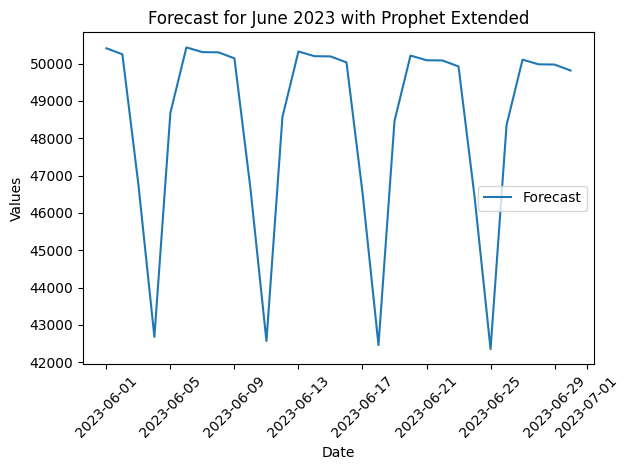

In [204]:
import matplotlib.pyplot as plt

# Create the line plot

plt.plot(forecast_june_2023.index, forecast_june_2023['FORECAST'], label='Forecast')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Forecast for June 2023 with Prophet Extended')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [205]:
df_volume = df.drop(df.columns[[0,1,2]], axis=1)
df_volume.rename(columns={'VOLUME':'ACTUAL'}, inplace=True)
df_volume

,ACTUAL
DATE,
2022-06-01,"44,003.56"
2022-06-02,"48,991.85"
2022-06-03,"51,690.92"
2022-06-04,"47,790.83"
2022-06-05,"42,896.64"
...,...
2023-05-27,"42,088.95"
2023-05-28,"34,965.85"
2023-05-29,"41,785.99"


In [206]:
actual_vs_forecast = forecast_result.loc[(forecast_result.index >= '2022-06-01') 
                                         & (forecast_result.index <= '2023-05-31')]
actual_vs_forecast = actual_vs_forecast.join(df_volume)
actual_vs_forecast

,FORECAST,ACTUAL
DATE,,
2022-06-01,"44,013.84","44,003.56"
2022-06-02,"49,179.14","48,991.85"
2022-06-03,"50,073.14","51,690.92"
2022-06-04,"46,611.34","47,790.83"
2022-06-05,"42,546.20","42,896.64"
...,...,...
2023-05-27,"46,874.22","42,088.95"
2023-05-28,"42,787.46","34,965.85"
2023-05-29,"48,789.83","41,785.99"


In [207]:
actual_vs_forecast.to_csv('actual_forecast_prophet.csv', index=True)

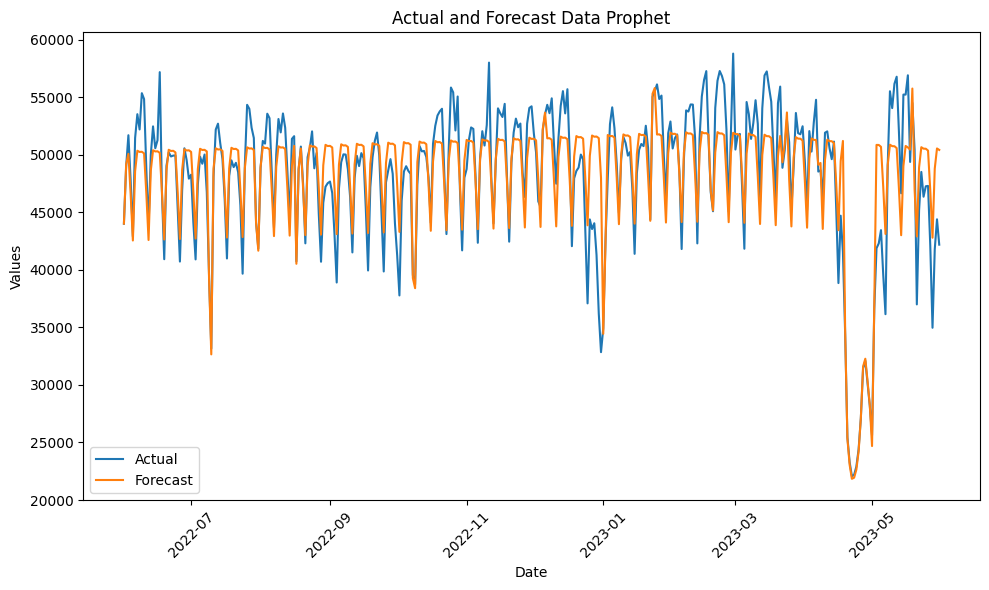

In [208]:
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(actual_vs_forecast.index, actual_vs_forecast['ACTUAL'], label='Actual')
plt.plot(actual_vs_forecast.index, actual_vs_forecast['FORECAST'], label='Forecast')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual and Forecast Data Prophet')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Forecast Accuracy

In [209]:
# Split the data into train and test sets
train_size = int(len(actual_vs_forecast) * 0.8) 
train = actual_vs_forecast.iloc[:train_size]
test = actual_vs_forecast.iloc[train_size:]
print(actual_vs_forecast.shape)
print(train.shape,test.shape)

(365, 2)
(292, 2) (73, 2)


In [210]:
test.tail

<bound method NDFrame.tail of             FORECAST    ACTUAL
DATE                          
2023-03-20 49,878.97 54,475.40
2023-03-21 51,629.79 55,916.10
2023-03-22 49,341.11 48,862.36
2023-03-23 50,915.24 50,378.88
2023-03-24 53,669.48 53,045.17
...              ...       ...
2023-05-27 46,874.22 42,088.95
2023-05-28 42,787.46 34,965.85
2023-05-29 48,789.83 41,785.99
2023-05-30 50,540.63 44,387.87
2023-05-31 50,415.11 42,184.39

[73 rows x 2 columns]>

In [211]:
test.to_csv('Hasil_Prophet_Test', index=True)

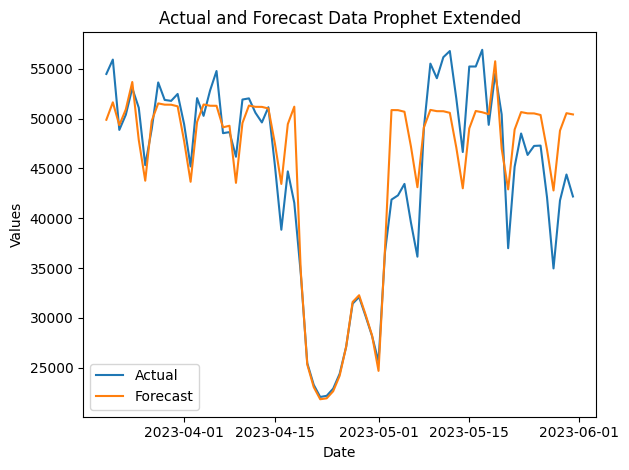

In [212]:
# Create the line plot
# plt.figure(figsize=(10, 6))
plt.plot(test.index, test['ACTUAL'], label='Actual')
plt.plot(test.index, test['FORECAST'], label='Forecast')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual and Forecast Data Prophet Extended')
plt.legend()
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [213]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate Mean Absolute Deviation (MAD)
mad = mean_absolute_error(test['ACTUAL'], test['FORECAST'])
print("Mean Absolute Deviation (MAD):", mad)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test['ACTUAL'] - test['FORECAST']) / test['FORECAST'])) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['ACTUAL'], test['FORECAST'])
print("Mean Squared Error (MSE):", mse)

Mean Absolute Deviation (MAD): 2908.529166798529
Mean Absolute Percentage Error (MAPE): 6.05677763256779
Mean Squared Error (MSE): 15601748.900013901


In [221]:
prophet_parameter = m.params
prophet_parameter

OrderedDict([('lp__', array([[863.884]])),
             ('k', array([[0.0375622]])),
             ('m', array([[0.822462]])),
             ('delta',
              array([[-5.99984e-09,  1.02132e-09,  2.07309e-08, -2.49354e-09,
                       2.58836e-09,  3.89943e-03,  8.10618e-04,  7.67456e-07,
                       5.16742e-09,  1.73570e-09, -4.19911e-10,  1.63873e-08,
                      -2.40029e-09,  2.20531e-09,  1.85967e-09, -1.22097e-06,
                      -1.93976e-02, -7.03288e-02, -4.41000e-02, -4.68803e-03,
                      -1.30268e-04, -1.41279e-10,  1.57995e-09,  5.64404e-09,
                       0.00000e+00]])),
             ('sigma_obs', array([[0.0533533]])),
             ('beta',
              array([[-3.08005e-02,  4.42744e-02,  3.00585e-02, -1.27881e-02,
                      -1.46921e-02,  1.43279e-04, -2.08695e-01, -2.38317e-01,
                      -1.72501e-01, -3.19263e-02, -1.05175e-01, -1.75645e-02,
                      -1.27700e-01, -

In [217]:
m.y_scale, m.t_scale, m.start

(58782.4, Timedelta('364 days 00:00:00'), Timestamp('2022-06-01 00:00:00'))

In [222]:
prophet_parameter['changepoints'] = m.changepoints_t
prophet_parameter['y_scale'] = m.y_scale
prophet_parameter['t_scale'] = 364
prophet_parameter

OrderedDict([('lp__', array([[863.884]])),
             ('k', array([[0.0375622]])),
             ('m', array([[0.822462]])),
             ('delta',
              array([[-5.99984e-09,  1.02132e-09,  2.07309e-08, -2.49354e-09,
                       2.58836e-09,  3.89943e-03,  8.10618e-04,  7.67456e-07,
                       5.16742e-09,  1.73570e-09, -4.19911e-10,  1.63873e-08,
                      -2.40029e-09,  2.20531e-09,  1.85967e-09, -1.22097e-06,
                      -1.93976e-02, -7.03288e-02, -4.41000e-02, -4.68803e-03,
                      -1.30268e-04, -1.41279e-10,  1.57995e-09,  5.64404e-09,
                       0.00000e+00]])),
             ('sigma_obs', array([[0.0533533]])),
             ('beta',
              array([[-3.08005e-02,  4.42744e-02,  3.00585e-02, -1.27881e-02,
                      -1.46921e-02,  1.43279e-04, -2.08695e-01, -2.38317e-01,
                      -1.72501e-01, -3.19263e-02, -1.05175e-01, -1.75645e-02,
                      -1.27700e-01, -

In [230]:
gamma_array = -prophet_parameter['changepoints'] * prophet_parameter['delta']
gamma_array

array([[ 2.47246154e-10, -8.13689011e-11, -2.50593297e-09,
         3.97322308e-10, -5.19094176e-10, -9.32006621e-04,
        -2.27151198e-04, -2.44573890e-07, -1.85970335e-09,
        -6.96187363e-10,  1.84576264e-10, -7.87850962e-09,
         1.24630442e-09, -1.23594297e-09, -1.11375841e-09,
         7.81554973e-07,  1.32159473e-02,  5.06212791e-02,
         3.35596154e-02,  3.74784816e-03,  1.09511011e-04,
         1.24201319e-10, -1.45407486e-09, -5.41145593e-09,
        -0.00000000e+00]])

In [231]:
prophet_parameter['gamma_array'] = gamma
prophet_parameter

OrderedDict([('lp__', array([[863.884]])),
             ('k', array([[0.0375622]])),
             ('m', array([[0.822462]])),
             ('delta',
              array([[-5.99984e-09,  1.02132e-09,  2.07309e-08, -2.49354e-09,
                       2.58836e-09,  3.89943e-03,  8.10618e-04,  7.67456e-07,
                       5.16742e-09,  1.73570e-09, -4.19911e-10,  1.63873e-08,
                      -2.40029e-09,  2.20531e-09,  1.85967e-09, -1.22097e-06,
                      -1.93976e-02, -7.03288e-02, -4.41000e-02, -4.68803e-03,
                      -1.30268e-04, -1.41279e-10,  1.57995e-09,  5.64404e-09,
                       0.00000e+00]])),
             ('sigma_obs', array([[0.0533533]])),
             ('beta',
              array([[-3.08005e-02,  4.42744e-02,  3.00585e-02, -1.27881e-02,
                      -1.46921e-02,  1.43279e-04, -2.08695e-01, -2.38317e-01,
                      -1.72501e-01, -3.19263e-02, -1.05175e-01, -1.75645e-02,
                      -1.27700e-01, -